In [2]:
%config Completer.use_jedi = False

# Introduction to Pandas

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features. In this section of the course, you should go through the notebooks in this order:

* Introduction to Pandas
* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Operations
* Data Input and Output

# Series

The first main data type we will learn about for pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

Let's explore this concept through some examples:

In [3]:
import numpy as np
import pandas as pd
from numpy.random import randn

### Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [3]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

In [4]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [5]:
pd.Series(data=my_list, index=labels)

a    10
b    20
c    30
dtype: int64

In [6]:
pd.Series(my_list, labels)

a    10
b    20
c    30
dtype: int64

In [7]:
pd.Series(arr, labels)

a    10
b    20
c    30
dtype: int32

In [8]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Data in a Series

A pandas Series can hold a variety of object types:

In [9]:
pd.Series(data=labels)

# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:

In [10]:
ser1 = pd.Series([1,2,3,4], index = ['USA', 'Germany', 'USSR', 'Japan'])

ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan']) 

In [11]:
ser1['USA']

1

In [12]:
# Operations are then also done based off of index:

ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [13]:
np.random.seed(101)

In [14]:
# data
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [15]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [16]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [17]:
df[['W', 'Z']] # Pass a list of column names

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [18]:
df.W # SQL Syntax 

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [19]:
# DataFrame Columns are just Series
type(df.W)

pandas.core.series.Series

**Creating a new column:**

In [20]:
df['new'] = df['W'] + df['Y']

In [21]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


** Removing Columns**

In [22]:
df.drop('new', axis=1)   # since we didn't use inplace it actually didnt drop the column!

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [23]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [24]:
df.drop('new', inplace=True, axis=1)

In [25]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [26]:
# Can also drop rows this way:
df.drop('E', axis=0)   # also needs inplace=True

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [27]:
# Selecting Row
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [28]:
# Or select based off of position instead of label
df.iloc[0]

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [29]:
# Selecting subset of rows and columns
df.loc['B', 'Y']

-0.8480769834036315

In [30]:
df.loc[['A', 'B'], ['W', 'Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [31]:
df > 0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [32]:
df[df > 0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [33]:
df[df['W'] > 0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [34]:
df[df['W'] > 0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [35]:
df[df['W'] > 0][['Y', 'X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


In [36]:
# For two conditions you can use | and & with parenthesis:
df[(df['W'] > 0) & (df['Y'] > 0)] 

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
E,0.190794,1.978757,2.605967,0.683509


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [37]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [38]:
# Reset to default 0,1...n index, and original index becomes another column
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [39]:
newind = 'CA NY WY OR CO'.split()

In [40]:
df['States'] = newind

In [41]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [42]:
df.set_index('States', inplace=True)

In [43]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [44]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index

[('G1', 1), ('G1', 2), ('G1', 3), ('G2', 1), ('G2', 2), ('G2', 3)]

In [45]:
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [46]:
df = pd.DataFrame(np.random.randn(6, 2), index=hier_index, columns=['A', 'B'])
df

A         B
G1 1  0.302665  1.693723
   2 -1.706086 -1.159119
   3 -0.134841  0.390528
G2 1  0.166905  0.184502
   2  0.807706  0.072960
   3  0.638787  0.329646

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [47]:
df.loc['G1']

,A,B
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [48]:
df.loc['G1'].loc[1]

A    0.302665
B    1.693723
Name: 1, dtype: float64

In [49]:
df.index.names

FrozenList([None, None])

In [50]:
df.index.names = ['Group', 'Num']

In [51]:
df

A         B
Group Num                    
G1    1    0.302665  1.693723
      2   -1.706086 -1.159119
      3   -0.134841  0.390528
G2    1    0.166905  0.184502
      2    0.807706  0.072960
      3    0.638787  0.329646

In [52]:
df.xs('G1') # df.loc['G1']

,A,B
Num,,
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [53]:
df.xs(['G1', 1]) # df.loc['G1'].loc[1]

A    0.302665
B    1.693723
Name: (G1, 1), dtype: float64

## Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:

In [56]:
df = pd.read_csv("./weather_data.csv")
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [57]:
type(df['day'][0])   # we want to turn this into a date column from a csv

str

In [58]:
df = pd.read_csv("weather_data.csv", parse_dates=["day"])
type(df['day'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [61]:
#set 'day' column as index of dataframe
df.set_index('day', inplace=True) 
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [62]:
new_df = df.fillna(0) # set all NaN values to 0
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [63]:
# set NaN value to what you want for each specific column
new_df = df.fillna({
    'temperature' : 0,
    'windspeed' : 0,
    'event' : 'no event'
})

new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [64]:
new_df = df.fillna(method='ffill') # put in NAN column whatever was in the previous row

# new_df = df.fillna(method='bfill') put in NAN column whatever was in the next row
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [65]:
new_df = df.interpolate() # fills NaN values based on linear interpolation formula
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [66]:
new_df = df.interpolate(method='time') # fills NaN values based on time interpolation formula
# second row is closer to third one in time so its value will be more similar to that
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [67]:
new_df = df.dropna() # drop all rows with NaN values
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [68]:
new_df = df.dropna(how="all") # drop only if all columns of the row are empty
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [69]:
new_df = df.dropna(thresh=2) # only keep rows that have atleast 2 valid values inside them
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [71]:
# some of our dates are missing in the dataframe, we want to add them

dt = pd.date_range("01-01-2017", "01-11-2017") # create a pandas date range
idx = pd.DatetimeIndex(dt) # create pandas date time index
df = df.reindex(idx) # add new index 
df

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


# Groupby

The groupby method allows you to group rows of data together and call aggregate functions

In [72]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


** Now you can use the .groupby() method to group rows together based off of a column name. For instance let's group based off of Company. This will create a DataFrameGroupBy object:**

In [73]:
df.groupby('Company')

In [74]:
# You can save this object as a new variable:
by_comp = df.groupby('Company')

# And then call aggregate methods off the object:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [75]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [78]:
# More examples of aggregate methods:

by_comp.min()
by_comp.max()

by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [79]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [80]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [83]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

# Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. In this lecture we will discuss these 3 methods with examples.

In [86]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                  index = [0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


## Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [87]:
pd.concat([df1, df2, df3])   # concats on axis=0 (rows) by default

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [88]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [89]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})   

## Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [97]:
pd.merge(left, right, how='inner', on='key')  # key column is common between both dataframes

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


## Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [98]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [99]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [100]:
left.join(right, how ='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category. Let's show them here in this lecture:

In [102]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [104]:
#Unique Values
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [106]:
# number of Unique Values 
df['col2'].nunique()

3

In [33]:
df['col2'].value_counts() # repetition of each unique value

NameError: name 'df' is not defined

In [110]:
# Selecting Data
new_df = df[(df['col1'] > 2) & (df['col2'] == 444)]
new_df

,col1,col2,col3
3,4,444,xyz


In [113]:
# Applying Functons
def times2(x):
    return x*2

df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [114]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [115]:
df['col1'].sum()   # sum of all values on a column

10

** Permanently Removing a Column**

In [116]:
del df['col1']
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [118]:
# Get column and index names
df.columns
df.index

RangeIndex(start=0, stop=4, step=1)

In [119]:
# Sorting and Ordering a DataFrame
df.sort_values(by='col2')

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


In [120]:
# Find Null Values or Check for Null Values
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


# Data Input and Output

This is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [122]:
#  CSV

df = pd.read_csv('example')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [123]:
df.to_csv('example', index=False)

In [125]:
#  Excel
'''
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas
or images, having images or macros may cause this read_excel method to crash.
'''

pd.read_excel('Excel_Sample.xlsx', sheet_name='Sheet1')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [127]:
df.to_excel('Excel_Sample.xlsx', sheet_name='Sheet1')

In [131]:
'''
HTML
Pandas read_html function will read tables off of a webpage and return a list of 
DataFrame objects:

even if table has many pages, it will loop through all of them
'''
df = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')
df[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 1, 2019"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","January 29, 2019"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","January 29, 2019"


## Date and Time

In [100]:
ufo_report = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv")
ufo_report.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [102]:
ufo_report.dtypes  # if it shows object then means it is stored as string

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [108]:
ufo_report.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [109]:
# here we will override the time column to use it as Time type
ufo_report['Time'] = pd.to_datetime(ufo_report.Time)

In [110]:
ufo_report.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [112]:
ufo_report.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [114]:
ufo_report.Time.dt.year.head()

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Time, dtype: int64

In [119]:
ts = pd.to_datetime('1/1/1990')

In [123]:
ufo_report.loc[ufo_report.Time >= ts].head()

,City,Colors Reported,Shape Reported,State,Time
6257,Minneapolis,NaN,NaN,MN,1990-01-01 00:00:00
6258,no data,NaN,NaN,NV,1990-01-01 23:00:00
6259,Barkhamsted,NaN,NaN,CT,1990-01-03 20:00:00
6260,New Orleans,NaN,DISK,LA,1990-01-06 22:00:00
6261,Sutton,NaN,VARIOUS,AK,1990-01-07 09:00:00


In [126]:
ufo_report.Time.max() - ufo_report.Time.min()  # time delta object tells difference between first and last ufo occurance

Timedelta('25781 days 01:59:00')

In [127]:
(ufo_report.Time.max() - ufo_report.Time.min()).days # how many days was it

25781

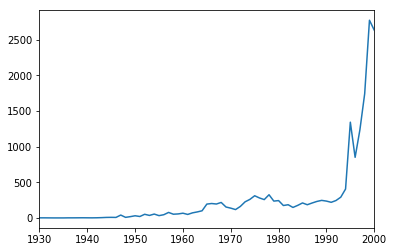

In [139]:
import matplotlib
%matplotlib inline
ufo_report['Year'] = ufo_report.Time.dt.year
ufo_report.Year.value_counts().sort_index().plot()

## SF Salaries Exercise

In [4]:
sal = pd.read_csv('Files/Salaries.csv')
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
# Use the .info() method to find out how many entries there are
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
# What is the average BasePay ?
sal['BasePay'].mean()

66325.4488404877

In [7]:
# What is the highest amount of OvertimePay in the dataset ?
sal.OvertimePay.max()

245131.88

In [10]:
'''What is the job title of JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an 
answer that doesn't match up (there is also a lowercase Joseph Driscoll)'''

sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [15]:
# How much does JOSEPH DRISCOLL make (including benefits)?
salary = sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']
print(salary)

24    270324.91
Name: TotalPayBenefits, dtype: float64


In [16]:
# What is the name of highest paid person (including benefits)?
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]['EmployeeName']
# or
# sal.loc[sal['TotalPayBenefits'].idxmax()]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [18]:
''' What is the name of lowest paid person (including benefits)? 
Do you notice something strange about how much he or she is paid? '''
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]

## ITS NEGATIVE!! VERY STRANGE

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [28]:
# What was the average (mean) BasePay of all employees per year? (2011-2014) ?

# averge for all 4 years
sal[(sal['Year'] >= 2014) & (sal['Year'] <= 2014)]['BasePay'].mean()
# averge for each year 
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [29]:
# How many unique job titles are there?
sal['JobTitle'].nunique()

2159

In [35]:
# What are the top 5 most common jobs?
sal['JobTitle'].unique()[-5:]

sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [43]:
'''How many Job Titles were represented by only one person in 2013? 
(e.g. Job Titles with only one occurence in 2013?)'''

# sums up all True values
sum(sal[sal['Year']==2013]['JobTitle'].value_counts() == 1)

202

In [44]:
# How many people have the word Chief in their job title?

In [48]:
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

sum(sal['JobTitle'].apply(lambda x: chief_string(x)))

627

In [58]:
# Is there a correlation between length of the Job Title string and Salary?
sal['title_len'] = sal['JobTitle'].apply(len)
    
sal[['title_len', 'TotalPayBenefits']].corr() #.iloc[0]['TotalPayBenefits']

,title_len,TotalPayBenefits
title_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


### Ecommerce Purchases Exercise

In [61]:
ecom = pd.read_csv('Files/Ecommerce Purchases')
ecom.head(3)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95


In [63]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [64]:
# What is the average Purchase Price?
ecom['Purchase Price'].mean()

50.347302

In [66]:
#  What were the highest and lowest purchase prices?
ecom['Purchase Price'].max()
ecom['Purchase Price'].min()

0.0

In [69]:
# How many people have English 'en' as their Language of choice on the website?
len(ecom[ecom['Language'] == 'en'])

1098

In [70]:
ecom[ecom['Language'] == 'en'].count()

Address             1098
Lot                 1098
AM or PM            1098
Browser Info        1098
Company             1098
Credit Card         1098
CC Exp Date         1098
CC Security Code    1098
CC Provider         1098
Email               1098
Job                 1098
IP Address          1098
Language            1098
Purchase Price      1098
dtype: int64

In [73]:
ecom[ecom['Job'] == 'Lawyer'].count()

Address             30
Lot                 30
AM or PM            30
Browser Info        30
Company             30
Credit Card         30
CC Exp Date         30
CC Security Code    30
CC Provider         30
Email               30
Job                 30
IP Address          30
Language            30
Purchase Price      30
dtype: int64

In [82]:
"""How many people made the purchase during the AM and how many people made the purchase 
during PM ?"""

ecom.head(1)
ecom['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [86]:
# What are the 5 most common Job Titles?
ecom['Job'].value_counts().head(5)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Purchasing manager                   27
Name: Job, dtype: int64

In [87]:
'''Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for 
this transaction?'''

ecom[ecom['Lot'] == "90 WT"]['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

In [89]:
# What is the email of the person with the following Credit Card Number: 4926535242672853
ecom[ecom['Credit Card'] == 4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

In [91]:
'''How many people have American Express as their Credit Card Provider *and made a 
purchase above $95 ?'''
ecom[(ecom['CC Provider'] == "American Express") & (ecom['Purchase Price'] > 95)].count()

Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39
Email               39
Job                 39
IP Address          39
Language            39
Purchase Price      39
dtype: int64

In [92]:
# How many people have a credit card that expires in 2025?
def check_expire(val):
    if int(val[-2:]) == 25:
        return True
    else:
        return False

sum(ecom['CC Exp Date'].apply(lambda x : check_expire(x)))

1033

In [97]:
# What are the top 5 most popular email providers/hosts?
def provide(val):
    return val.split('@')[1]

y = ecom['Email'].apply(lambda x : provide(x))
y.value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

## Pandas challenges

https://www.machinelearningplus.com/python/101-pandas-exercises-python/

In [7]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
# mylist would be key and myarr would be value
mydict = dict(zip(mylist, myarr)) 

ser1 = pd.Series(mylist)
ser2 = pd.Series(myarr)
ser3 = pd.Series(mydict)

In [11]:
# change series into dataframe
ser = pd.Series(mydict)

pd.DataFrame(ser)
# other way
ser.to_frame().reset_index().head()

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


In [46]:
# combine many series to form a dataframe
df = ser1.to_frame()
df[2] = ser2.to_frame()

#other ways
pd.concat([ser1, ser2], axis=1)
pd.DataFrame({'col1' : ser1, 'col2' : ser2}).head()

,0,1
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


In [36]:
# assign name to the series’ index
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser.name = 'index'
ser.head()

0    a
1    b
2    c
3    e
4    d
Name: index, dtype: object

In [41]:
# get the items of series A not present in series B
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

ser1.isin(ser2) # Check whether `values` are contained in Series. returns True/False
ser1[~ser1.isin(ser2)]

0    1
1    2
2    3
dtype: int64

In [57]:
#  items not common to both series A and series B
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

x = ser1[~ser1.isin(ser2)]
y = ser2[~ser2.isin(ser1)]
pd.concat([x, y], axis=1)

# other ways
# union
u = pd.Series(np.union1d(ser1, ser2))
# intersect
i = pd.Series(np.intersect1d(ser1, ser2))
# union - intersect
u[~u.isin(i)]

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64

In [72]:
# minimum, 25th percentile, median, 75th, and max of a numeric series
ser = pd.Series(np.random.normal(10, 5, 25))

print(np.percentile(ser, q=[0, 50, 100, 75, 25]))

#other way
print(ser.min(), ser.median(), ser.max())

[ 2.94231097  8.83210332 16.34332757 11.47020333  6.04925039]
2.942310966360652 8.832103319198433 16.343327569880913


In [77]:
# turn numpy array to series
arr = np.asarray([10 ,20 ,30 ,40 ,50])
ser = pd.Series(arr)
ser

0    10
1    20
2    30
3    40
4    50
dtype: int32

In [85]:
# change the order of index of a given series
ser = pd.Series(np.arange(1,6), index = ['A', 'B', 'C', 'D', 'E'])

ser_changed = ser.reindex(index= ['B','A','D','C','E'])
ser_changed

B    2
A    1
D    4
C    3
E    5
dtype: int32

In [4]:
# How to combine multiple rows of strings into one using pandas?

# You can use "str.cat" to join the strings in each row. For a Series or column s, write:

s = pd.Series(["a", "b", "c"])
s.str.cat(sep=', ')

'a, b, c'

In [ ]:
# Select by partial string from a pandas DataFrame

# I have a DataFrame with 4 columns of which 2 contain string values. I was wondering if there was a way to select rows based 
# on a partial string match against a particular column?

df[df['A'].str.contains("hello")]

In [5]:
# Applying function with multiple arguments to create a new pandas column

df = pd.DataFrame({"A": [10,20,30], "B": [20, 30, 10]})

df['new_column'] = np.multiply(df['A'], df['B'])

In [ ]:
# How to get a value from a Pandas DataFrame and not the index and object type?

df[df.Letters=='C'].Letters.item()

# his returns the first element in the Index/Series returned from that selection. In this case, the value is always the 
# first element.

In [6]:
# Drop Duplicate Rows in a DataFrame

# how to remove duplicate records and combinations of columns in a Pandas dataframe and keep only the unique values.

data = {"Name": ["James", "Alice", "Phil", "James"],
        "Age": [24, 28, 40, 24],
        "Sex": ["Male", "Female", "Male", "Male"]}

df = pd.DataFrame(data)
df = df.drop_duplicates()
print(df)

data = {"Name": ["James", "Alice", "Phil", "James"],
        "Age": [24, 28, 40, 25],
        "Sex": ["Male", "Female", "Male", "Male"]}

df = pd.DataFrame(data)
df = df.sort_values('Age', ascending=False)
df = df.drop_duplicates(subset='Name', keep='first')
print(df)

    Name  Age     Sex
0  James   24    Male
1  Alice   28  Female
2   Phil   40    Male
    Name  Age     Sex
2   Phil   40    Male
1  Alice   28  Female
3  James   25    Male


In [ ]:
# pandas groupby without turning grouped by column into index

df.groupby(['col2','col3'], as_index=False).sum()

# or

df.groupby(['col2', 'col3']).sum().reset_index()

In [ ]:
# pandas create one column equal to another if condition is satisfied

# set column C equal to column B
df.loc[df['colA'] == 'a', 'colC'] = df['colB']

"value_counts" is a Series method rather than a DataFrame method (and you are trying to use it on a DataFrame, clean). You need to perform this on a specific column:

clean[column_name].value_counts()

To get all the counts for all the columns in a dataframe, it's just df.count()